In [1]:
# Data - us air data
# Link to data - http://networkrepository.com/inf-USAir97.php

# Data Statistics
# Nodes 332
# Edges 2126

## Libraries Import

In [2]:
import csv
import numpy as np
import random
from itertools import combinations 
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
def read_graph_edges(filename, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)] 
    link_count = 0
    with open(filename, 'r') as data:
        for line in data:
            edge_list = line.split()                                     # Split the edge data

            # Since the graph is undirected, we need to take into account 
            # the edge to be represented both ways in the adjacency matrix
            # a to b and b to a. Undirected graph -> symmetric adjacency matrix

            adj_matrix[int(edge_list[0]) - 1][int(edge_list[1]) - 1] = 1 # Indicate the edge a to b in the adjacency matrix
            adj_matrix[int(edge_list[1]) - 1][int(edge_list[0]) - 1] = 1 # Indicate the edge b to a in the adjacency matrix

            link_count += 1
        print('Link Count:', link_count)
    return adj_matrix, link_count

In [4]:
num_nodes = 332

adj_matrix, link_count = read_graph_edges('usair.txt', num_nodes)

Link Count: 2126


## Q.1. a)

(a) Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.

In [5]:
# Since the data is in the form of edge list, therefore respresenting it
# in the form of adjacency matrix and the matrix has been converted to 
# the csv format file as the number of nodes is 332

# Write the adjacency matrix to a CSV file
def write_adj_matrix(filename, adj_matrix):
    with open(filename,"w+") as mtx_csv:
        csvWriter = csv.writer(mtx_csv,delimiter=',')
        csvWriter.writerows(adj_matrix)

In [6]:
write_adj_matrix("Q1_adj_matrix.csv", adj_matrix)

## Q.1. b)

(b) Visualize the network.

In [7]:
# Q.1. b) is Visualizing the network and hence has been done in the Cytoscape. 
# The network image has been attached separately named as Q1.b.png


## Q.1. c)

(c) Comment on the ‘sparseness’ of the network.

In [8]:
node_list = [item for item in range(0, num_nodes)]           # Finds the list of node numbers in the graph
all_pairs = list(combinations(node_list, 2))                 # Lists all the combinations of the node pairs
print("Total number of links possible:", len(all_pairs))
print("Percentage of links present:", (link_count/len(all_pairs))*100)

Total number of links possible: 54946
Percentage of links present: 3.8692534488406802


Since the total number of links possible are 54946
and the actual number of edges present are 2126

Therefore, only 3.87% links are present out of the actual number.

This number can be termed as less as the adjacency matrix consists of ~96% zeroes which is very less but since it is the case of real world network where we never get fully connected network or not even close to it many a times.

## Q.1. d)

(d) Compute its average degree <𝑘>.

In [9]:
np_adj_matrix = np.array(adj_matrix)                       # Converts the list of list into numpy list
sum_degree = np.sum(np_adj_matrix, axis = 1)               # Sums the degree of the node row-wise
print('Average degree <k>:', np.sum(sum_degree)/num_nodes) # Finds the average degree of the network

Average degree <k>: 12.80722891566265


## Q.1. f)

(f) Compute its Average Path Length (Implement Breadth First Search Algorithm), Diameter and Average Clustering Coefficient.

In [10]:
# BFS or Breadth first search algorithm

def bfs(source):
    visited = [False for i in range(num_nodes)]     # Visited array keeps track of all the nodes visited
    dist  = [100000 for i in range(num_nodes)]      # dist is the distance of all the nodes reachable from the source node.
                                                    # By default, One lakh is the infinite value assumed
    farthest_vertex = source                        # farthest_vertex stores the farthest vertesx from the given node     
    max_val = 0                                     # max_val stores the maximum distance of the node from given node
    queue = []                                      # queue keeps the nodes to be traversed in FIFO manner
    
    queue.append(source)                            # Source or the starting node is inserted into the queue
    dist[source] = 0                                # Distance of the source node from itself is Zero
    
    while len(queue) != 0:                          # The loop runs until the queue become empty
        front = queue[0]                            # Take the front element from the queue
        queue.pop(0)                                # Remove the front element or the element at 0th index
        visited[front] = True                       # Mark the front element as visited = True
        for i in range(len(adj_matrix[front])):     # for all the nodes present in the graph
            if adj_matrix[front][i] == 1:           # if the node is the neighbour of the front node
                if visited[i] == False and i not in queue:  # If the neighbour node is not visited and not already in the queue
                    dist[i] = dist[front] + 1       # Increase the distance of the node by 1
                    queue.append(i)                 # Also append that node to the end of the queue
                    
                    if dist[i] > max_val:           # Also update the max_val and farthest_vertex
                        max_val = dist[i]
                        farthest_vertex = i
    return dist, farthest_vertex, max_val                 # Return max_val and farthest_vertex

In [11]:
# Finding Average Path length

path_length_list = []
i=1
for node in range(num_nodes):
    dist, farthest_vertex, max_val = bfs(node)            # Call bfs on each node
    for j in range(node+1, num_nodes):
        path_length_list.append(dist[j])                  # Get the distance of each other node from the current node
    i+=1

print('Average Path length, <d>:', np.sum(path_length_list)/len(all_pairs))

Average Path length, <d>: 2.7381247042550867


In [12]:
# Function that checks the link between two nodes

def check_links(source, dest):
    if adj_matrix[source][dest] == 1:
        return 1
    else:
        return 0

In [13]:
# Function that returns for the neighbours of the node

def get_neighbours(node):
    return np.nonzero(adj_matrix[node])

In [14]:
# Calculating Average Clustering Coefficient

total_Ci = 0
for node in node_list:
    Li = 0
    neighbours = get_neighbours(node)                                       # Get all neighbours of the node
    neighbour_comb = list(combinations(neighbours[0].tolist(), 2))          # Finds all combinations of the neighbours
    if len(neighbour_comb) != 0:                                            # If combinations exists
        for neighbour_tuple in neighbour_comb:                              # Check for each combination(present as a tuple)
            if adj_matrix[neighbour_tuple[0]][neighbour_tuple[1]] == 1:     # If there exists a link between the combination of nodes
                Li += 1
        Ci = Li/len(neighbour_comb)                                         # Ci is the Clustering coefficient of the node in focus
        total_Ci += Ci
print('Average Clustering Coefficient, <C>:', total_Ci/num_nodes)

Average Clustering Coefficient, <C>: 0.625217249162503


In [15]:
# Way of finding Diameter
# 1. From any arbitrary vertex, find the farthest vertex from it by running the bfs algorithm.
# 2. From the farthest vertex obtained in Step 1, again run bfs and find the farthest vertex.
# 3. The distance between the vertex obtained in Step 2 and Step 1 is the diameter.

dist, farthest_vertex, max_val = bfs(0)
dist, farthest_vertex, max_val = bfs(farthest_vertex)
print('Diameter:', max_val)

Diameter: 6


## Q.1. e)

(e) Plot its ‘scaled degree distribution’, 𝑝𝑘×𝑘.

In [16]:
# For degree distribution
sum_degree = np.sum(np_adj_matrix, axis = 1)         # Since the graph is undirected, summing the adjacency matrix row wise
max_degree = np.max(sum_degree)                      # Finds the max degree for scaling the degree distribution
degree_dist = Counter(sum_degree)                    # Finds the frequency of the degrees encountered
degree_dist_list = list(degree_dist.items())         # Converting the dictionary obtained as degree_dist to the list form

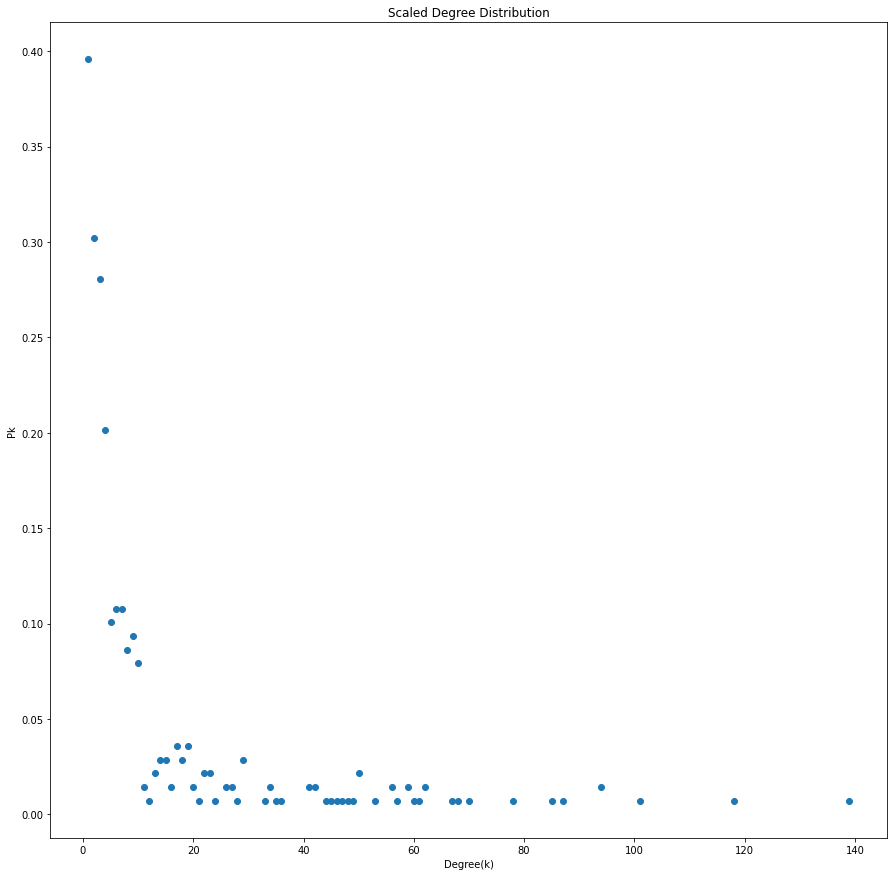

In [17]:
# This code plots the Scaled Degree Distribution

scaled_degree = [(elem1, elem2/max_degree) for elem1, elem2 in degree_dist_list]  # Scaling the frequency by dividing by max_degree
fig = plt.figure(figsize = (15,15))
plt.scatter(*zip(*scaled_degree))
plt.title('Scaled Degree Distribution')
plt.xlabel('Degree(k)')
plt.ylabel('Pk')
plt.show()

## Q.4.

Write a Python script to create a Gilbert random graph corresponding to an undirected and unweighted real-world network. Plot and compare their ‘degree distributions’. Compute the degree distribution of the random graph over 100 instances.

In [18]:
## Creating a Gilbert Random Graph

# p is the probability threshold under which the nodes will be connected and above that the nodes won't be connected.
# count is the number of links present in the graph already
L = 2126
p = L/len(all_pairs)
print('Probability, p:', p)

Probability, p: 0.0386925344884068


In [19]:
# This function creates a Gilbert Random Graph G(n, p).
# It first generates a random number between 0 and 1 for each pair of nodes
# If the number is less than the value p, then the edge is connected between the nodes, otherwise not connected.

def create_random_graph():
    random_adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    random_edges = 0
    for pair in all_pairs:
        num = random.uniform(0, 1)                      # Generate a random number between 0 and 1
        if num <= p: 
            random_adj_matrix[pair[0]][pair[1]] = 1     # Since undirected, therefore edge from a to b
            random_adj_matrix[pair[1]][pair[0]] = 1     # and edge from b to a
            random_edges += 1
    return random_adj_matrix

In [20]:
sum_random_degree = []
merged_degree_dict = {}
for i in range(100):                                              # For the ensemble of size = 100
    random_adj_matrix = create_random_graph()                     # Creates Random Graph
    degree_list = np.sum(random_adj_matrix, axis = 1)             # Degree for each node in the random graph
    degree_dist = Counter(degree_list)                            # Finds frequency of each degree
    for x, y in degree_dist.items():
        if x in merged_degree_dict.keys():
            merged_degree_dict[x].append(degree_dist[x])
        else:
            merged_degree_dict[x] = []
            merged_degree_dict[x].append(degree_dist[x])
    
    sum_random_degree.append(degree_list)
    
mean_dict = {}
std_dev_dict = {}
for x, y in merged_degree_dict.items():
    mean = np.mean(y)/num_nodes                                    # Calculates Mean of the values
    std_dev = np.std(y)/num_nodes                                  # Calculates standard deviation of the values
    mean_dict[x] = mean
    std_dev_dict[x] = std_dev

mean_list = []
std_list = []
for x in sorted(mean_dict):
    mean_list.append(mean_dict[x])                                 # Creates mean list
    std_list.append(std_dev_dict[x])                               # Creates standard deviation list

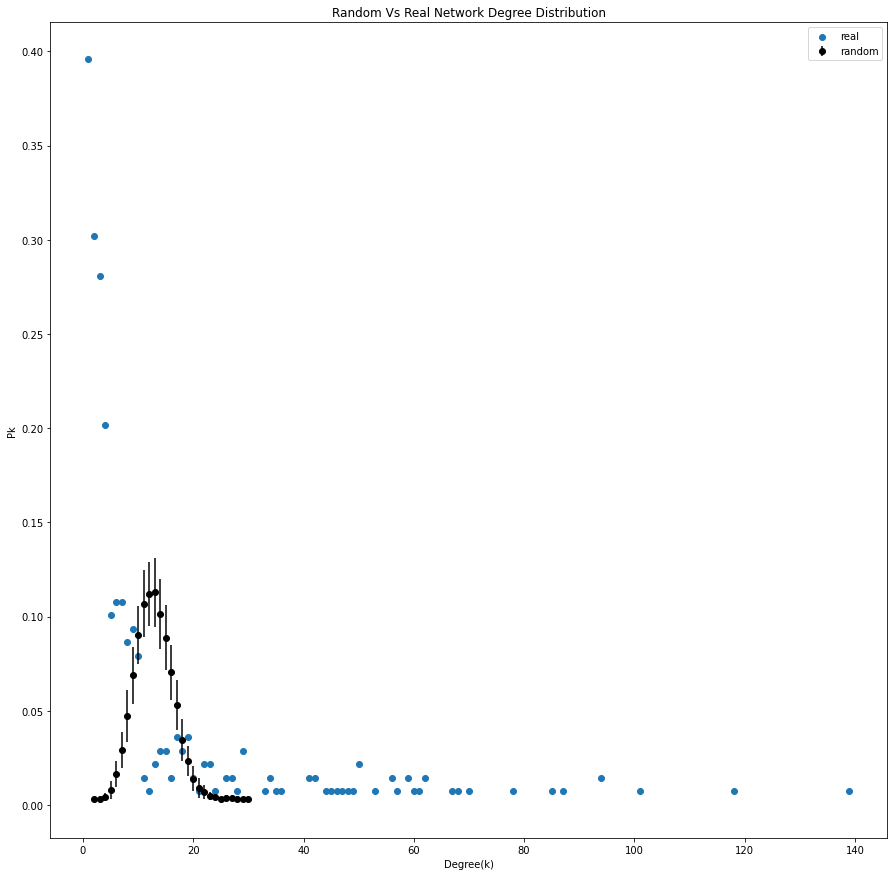

In [21]:
## Calculate degree distribution

# For degree distribution and plot the degree distribution
fig = plt.figure(figsize = (15,15))
sum_random_degree = np.sum(random_adj_matrix, axis = 1)
random_max_degree = np.max(sum_random_degree)
degree_dist_random = Counter(sum_random_degree)
degree_dist_random_list = list(degree_dist_random.items())

scaled_degree_random = [(elem1, elem2/random_max_degree) for elem1, elem2 in degree_dist_random_list]
plt.scatter(*zip(*scaled_degree), label = "real")
plt.errorbar(np.array(sorted(mean_dict)), mean_list, std_list, fmt='ok', label="random")
plt.title('Random Vs Real Network Degree Distribution')
plt.legend(loc ="upper right") 
plt.xlabel('Degree(k)')
plt.ylabel('Pk')
plt.show()

## Q.5.

Load the real-world networks studied in above examples in Cytoscape and visualize them using various layouts. Export the images.

In [22]:
# The real world network of us air was loaded into the Cytoscape tool and various layouts were represented.
# The images have been attached separately for your reference.

# The following layouts were tried:

## For usair dataset
# 1. Grid Layout - usair
# 2. Prefuse Force Directed Layout - usair
# 3. Degree Sorted Circle Layout - usair
# 4. Prefuse Force Directed OpenCL Layout - usair
# 5. Circular Layout - usair
# 6. Compound Spring Embedded (CoSE) - usair

## For celegan dataset
# 1. Grid Layout - celegan
# 2. Prefuse Force Directed Layout - celegan
# 3. Degree Sorted Circle Layout - celegan
# 4. Prefuse Force Directed OpenCL Layout - celegan
# 5. Circular Layout - celegan
# 6. Compound Spring Embedded (CoSE) - celegan


## Q.2.

Write Python script for computing in/out-degree for directed graphs. For a real world directed network compute and plot its in- and out- degree distribution.

In [23]:
# Data - The Caenorhabditis elegans worm’s neural network
# Link to data - http://opsahl.co.uk/tnet/datasets/celegans_n306.txt

# Data Statistics
# Nodes 306
# Edges 2345

In [24]:
# This function reads the edge list file, creates the adjacency matrix and also finds the in-degree and out-degree

def read_graph_edges_directed(filename, num_nodes):
    link_count = 0
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)] 
    in_degree = [0 for i in range(num_nodes)]
    out_degree = [0 for i in range(num_nodes)]
    with open(filename, 'r') as data:    
        for line in data:
            edge_list = line.split()                                       # Split the edge data

            # Since the graph is directed, we need to take into account 
            # the edge to be represented as a to b -> non symmetric adjacency matrix        
            adj_matrix[int(edge_list[0]) - 1][int(edge_list[1]) - 1] = 1

            in_degree[int(edge_list[1]) - 1] += 1                          # The second node will have in degree increased
            out_degree[int(edge_list[0]) - 1] += 1                         # The first node will have its out degree increased
            link_count += 1
    return adj_matrix, link_count, in_degree, out_degree

In [25]:
num_nodes = 306

# Finds the adjacency matrix for the directed graph
adj_matrix_directed, link_count, in_degree, out_degree = read_graph_edges_directed("celegan.txt", num_nodes)

write_adj_matrix("Q2_adj_matrix.csv", adj_matrix_directed)

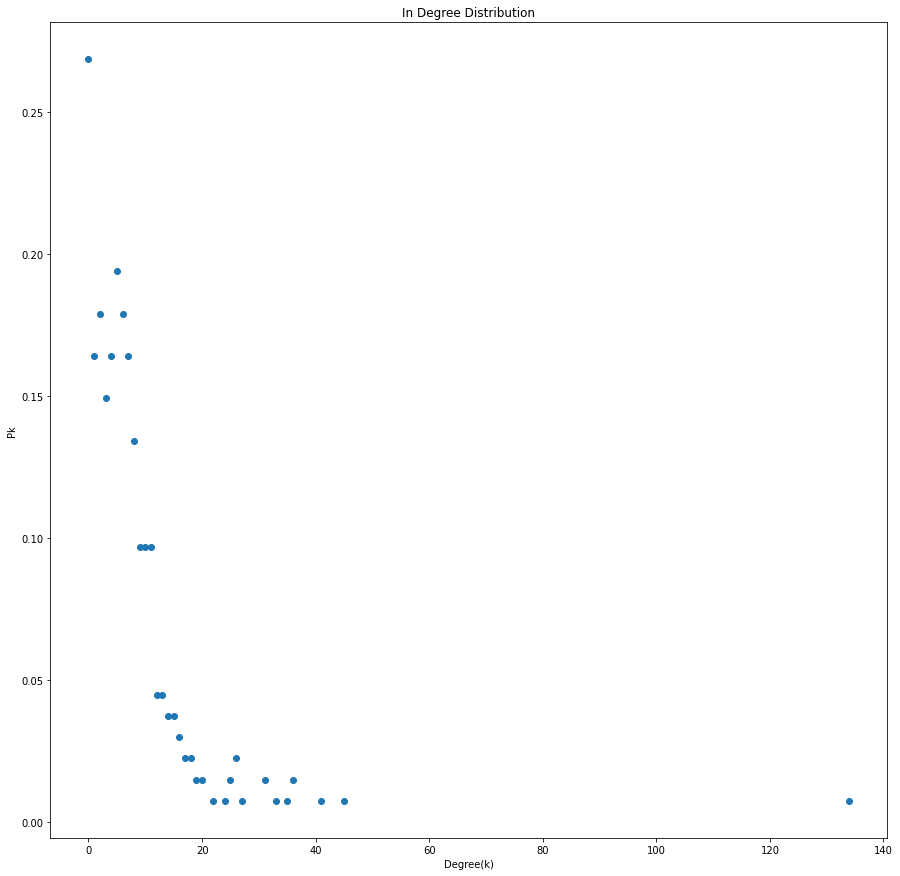

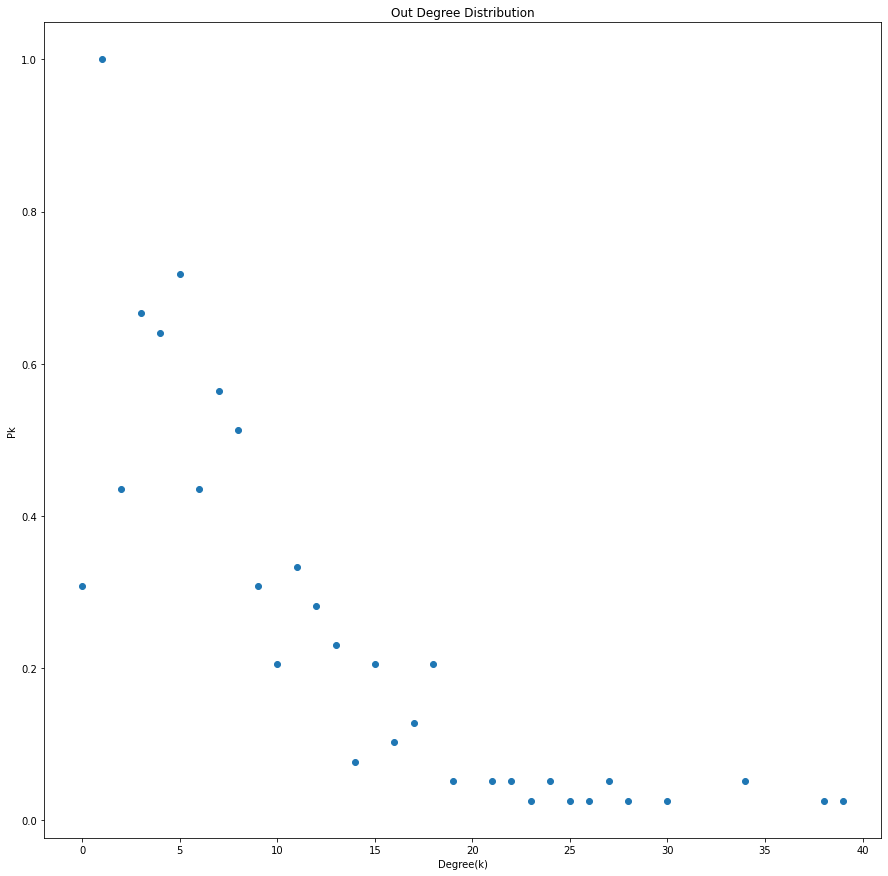

In [26]:
# Compute in-degree distribution and plot the graph

max_in_degree = np.max(in_degree)
indegree_dist = Counter(in_degree)
indegree_dist_list = list(indegree_dist.items())

scaled_degree = [(elem1, elem2/max_in_degree) for elem1, elem2 in indegree_dist_list]
fig = plt.figure(figsize = (15,15))
plt.scatter(*zip(*scaled_degree))
plt.title('In Degree Distribution')
plt.xlabel('Degree(k)')
plt.ylabel('Pk')
plt.show()

# Compute out-degree distribution and plot the graph

max_out_degree = np.max(out_degree)
outdegree_dist = Counter(out_degree)
outdegree_dist_list = list(outdegree_dist.items())

scaled_degree = [(elem1, elem2/max_out_degree) for elem1, elem2 in outdegree_dist_list]
fig = plt.figure(figsize = (15,15))
plt.scatter(*zip(*scaled_degree))
plt.title('Out Degree Distribution')
plt.xlabel('Degree(k)')
plt.ylabel('Pk')
plt.show()

## Q.3.

How would redefine the notion of ‘degree’ and ‘clustering coefficient’ for a weighted network to account for the edge weights? Implement a Python script to compute these and, for any relevant real-world graph, plot (a) ‘weighted degree distribution’ and (b) ‘Clustering Coefficient’ versus ‘Degree’.

Answer: 

    Redefining the notion of degree
    
    To calculate the weighted degree, we can sum all the edge weights from an edge. Just as in the case of unweighted network where we can only just count the edges by counting the number of ones in a particular row as the degree of that node, likewise the sum of the weights can be used to define the weighted degree of the node.
    
    For the network taken "The Caenorhabditis elegans worm’s neural network", the sum of weights can represent total number of synapses and gap junctions from a particular neuron.
    
    Redefining the notion of clustering coefficient
    
    The clustering coefficient can be redefined as the multiplication of total proportion of the weight attached to a node as compared to the total weight present in the graph and the clustering coefficient of unweighted graph. Since the value of clustering coefficient is always between 0 to 1, therefore proportion of weights have been taken into account.      
    

In [27]:
# Data - The Caenorhabditis elegans worm’s neural network
# Link to data - http://opsahl.co.uk/tnet/datasets/celegans_n306.txt

# Data Statistics
# Nodes 306
# Edges 2345

# Although this graph is directed in nature, but for the purpose of weighted computation, considering it as undirected

In [28]:
def read_graph_edges_weighted(filename, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)] 
    link_count = 0
    with open(filename, 'r') as data:
        for line in data:
            edge_list_data = line.split()                               # Split the edge data

            # Since the graph is undirected, we need to take into account 
            # the edge to be represented both ways in the adjacency matrix
            # a to b and b to a. Undirected graph -> symmetric adjacency matrix

            # edge_list_data[0] is the node
            # edge_list_data[1] is the node
            # edge_list_data[2] is the weight of the edge
            adj_matrix[int(edge_list_data[0]) - 1][int(edge_list_data[1]) - 1] = edge_list_data[2] # Indicate the edge a to b in the adjacency matrix
            adj_matrix[int(edge_list_data[1]) - 1][int(edge_list_data[0]) - 1] = edge_list_data[2] # Indicate the edge b to a in the adjacency matrix

            link_count += 1
    return adj_matrix, link_count

In [29]:
num_nodes = 306

# Call the function to get the weighted graph matrix
adj_matrix, link_count = read_graph_edges_weighted('celegan.txt', num_nodes)

In [30]:
np_adj_matrix = np.array(adj_matrix, dtype=int)            # Converts the list of list into numpy list
sum_weighted_degree = np.sum(np_adj_matrix, axis = 1)      # Sums the degree of the node row-wise

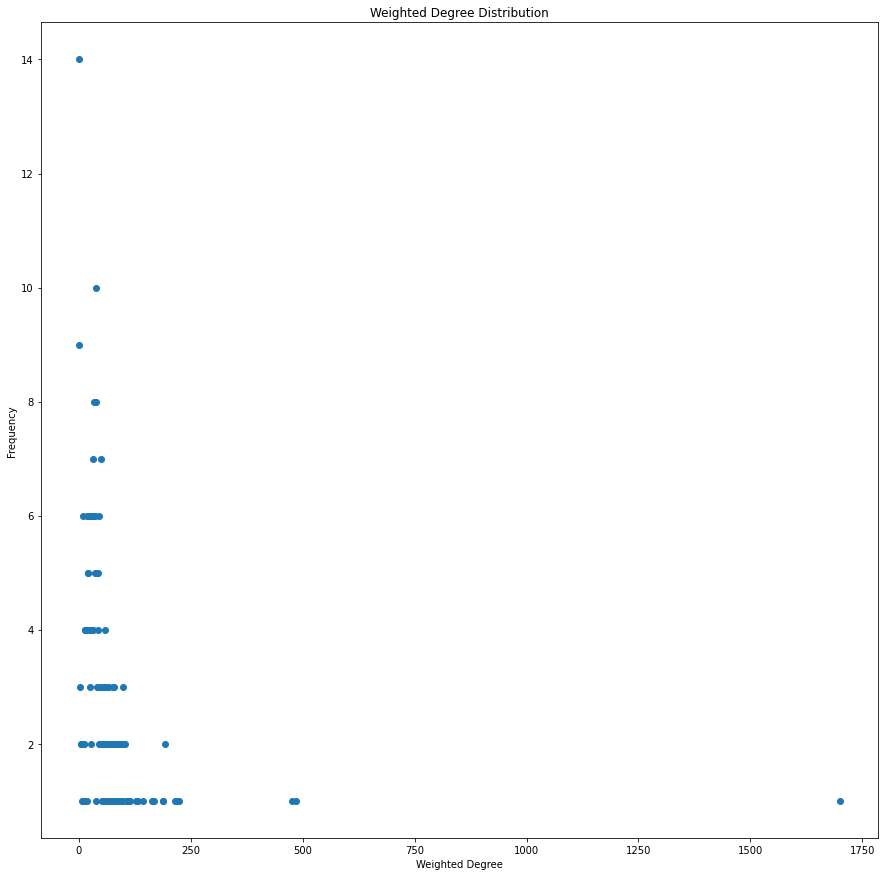

In [31]:
weighted_degree_dist = Counter(sum_weighted_degree)                            # Finds the frequency of each of the degree
weighted_degree_dist_list = list(weighted_degree_dist.items())

scaled_degree = [(elem1, elem2) for elem1, elem2 in weighted_degree_dist_list]
fig = plt.figure(figsize = (15,15))
plt.scatter(*zip(*scaled_degree))
plt.title('Weighted Degree Distribution')
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Calculating Clustering Coefficient for Weighted Network

total_Ci = 0
weighted_cc_dict = {}
node_list = [item for item in range(0, num_nodes)]           # Finds the list of node numbers in the graph
total_weight = np.sum(np_adj_matrix, axis = 1)
final_weight = np.sum(total_weight)
for node in node_list:
    Li = 0
    neighbours = get_neighbours(node)                                       # Get all neighbours of the node
    neighbour_comb = list(combinations(neighbours[0].tolist(), 2))          # Finds all combinations of the neighbours
    if len(neighbour_comb) != 0:                                            # If combinations exists
        for neighbour_tuple in neighbour_comb:                              # Check for each combination(present as a tuple)
            if np_adj_matrix[neighbour_tuple[0]][neighbour_tuple[1]] > 0:   # If there exists a link between the combination of nodes
                Li += 1
        Ci = Li/len(neighbour_comb)                                         # Ci is the Clustering coefficient of the node in focus
        weighted_Ci = (total_weight[node]/final_weight) * Ci
        if total_weight[node] in weighted_cc_dict.keys():
            weighted_cc_dict[total_weight[node]] = weighted_cc_dict[total_weight[node]]+weighted_Ci
        else:
            weighted_cc_dict[total_weight[node]] = weighted_Ci


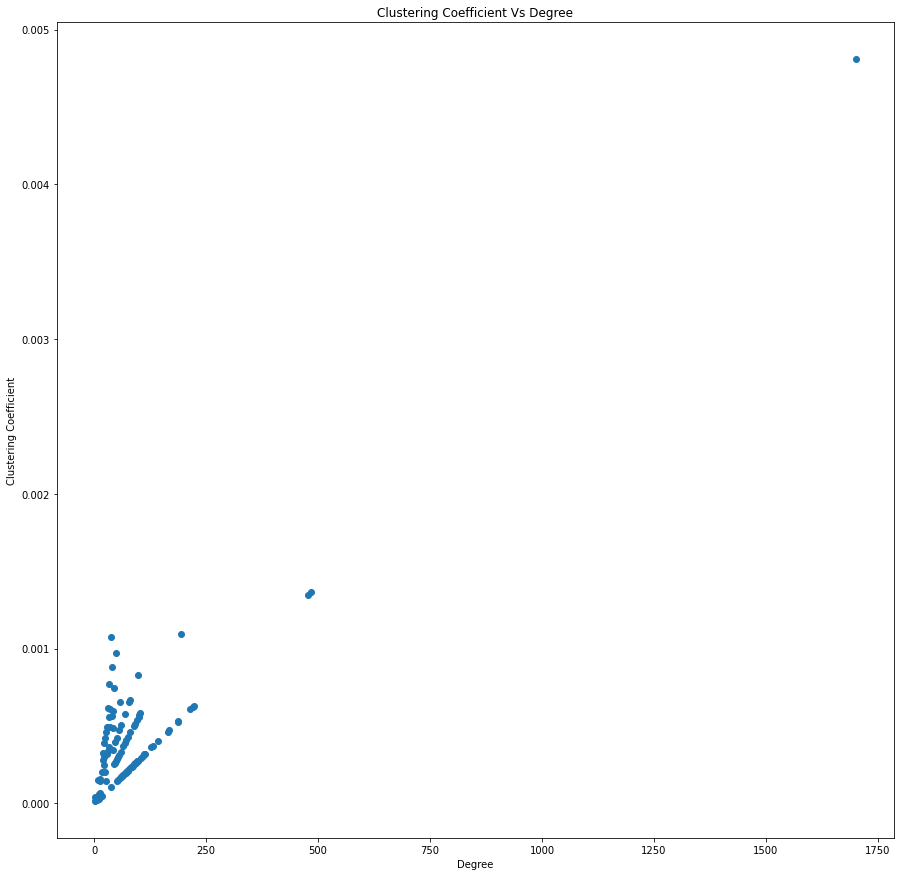

In [43]:
weighted_cc_dict_list = list(weighted_cc_dict.items())

scaled_degree = [(elem1, elem2) for elem1, elem2 in weighted_cc_dict_list]
fig = plt.figure(figsize = (15,15))
plt.scatter(*zip(*scaled_degree))
plt.title('Clustering Coefficient Vs Degree')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.show()